<a href="https://colab.research.google.com/github/amideo-7/StockPricePrediction/blob/main/appleStockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#Description: Using Artificial Recurrent Neural Networks called 
#             Long Short Term Memory (LSTM) to predict
#             closing stock price of a corporation (Apple) using 
#             past 60 days stock price data

In [96]:
#Importing the libraries
import math

#used to create a pandas DataFrame by using some popular financial data sources
import pandas_datareader as web
#Incase the pandas_datareader shows error then use yahoofinance 'yfinance' instead
import yfinance as yf

#used to working with arrays and complex calculations
import numpy as np

#used to provide fast, flexible and expressive datastructures
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [97]:
start = dt.datetime(2012,1,1)
end = dt.datetime(2023,3,31)
company = 'AAPL'

#Get the dataframe
# df = web.dataframe [if this doesn't works then use the following]
df = yf.download(company, start , end)

#Show the dataframe
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500195,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567369,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706892,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839729,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819361,394024400
...,...,...,...,...,...,...
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200


In [98]:
#Getting the shape (number of rows and columns) in the dataframe
df.shape

(2829, 6)

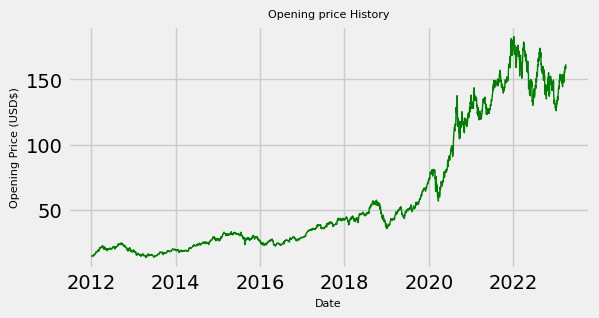

In [99]:
#visualizing the opening data
plt.figure(figsize=(6,3))
plt.title('Opening price History', fontsize=8)
plt.plot(df['Open'],color='green',linewidth=1)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Opening Price (USD$)', fontsize=8)
plt.show()

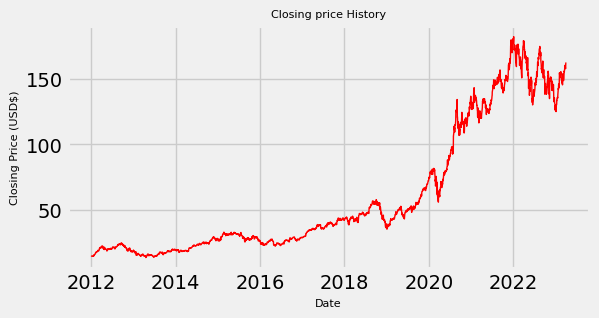

In [100]:
#visualizing the closing data
plt.figure(figsize=(6,3))
plt.title('Closing price History',fontsize=8)
plt.plot(df['Close'],color='red',linewidth=1)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Closing Price (USD$)', fontsize=8)
plt.show()

In [101]:
#Alternate plotting method
"""fig, ax = plt.subplots()
ax.plot(df['Close'])"""

"fig, ax = plt.subplots()\nax.plot(df['Close'])"

In [102]:
#Creting new dataframe with only close column
data = df.filter(['Close'])
print(data)

#Convert the dataframe to a numpy array
dataset = data.values
print(dataset)

#Get the number of rows to train the model on
#The length of the complete array here will be around 2002
#But we will take only 80% of the data to train the model
#Therefore we have multiplied the length of the array with 0.8
training_data_len = math.ceil(len(dataset)*0.8)
print(training_data_len)

                 Close
Date                  
2012-01-03   14.686786
2012-01-04   14.765714
2012-01-05   14.929643
2012-01-06   15.085714
2012-01-09   15.061786
...                ...
2023-03-24  160.250000
2023-03-27  158.279999
2023-03-28  157.649994
2023-03-29  160.770004
2023-03-30  162.360001

[2829 rows x 1 columns]
[[ 14.6867857 ]
 [ 14.76571369]
 [ 14.92964268]
 ...
 [157.6499939 ]
 [160.77000427]
 [162.36000061]]
2264


In [103]:
#Scaling the data to the range of (0,1)
#This is a preprocessing step so that calculatons
#can be reduced at future steps
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.85505391],
       [0.8736185 ],
       [0.88307924]])

In [104]:
#Creating the training dataset from the scaled dataset
train_data = scaled_data[0:training_data_len,:]

#Spliting the data into x_trin and y_train datasets
#x_train dataset will contain the values using which out model will be trained
#y_train dataset will contain the values that our model is supposed to predict
x_train = []
y_train = []
for i in range(60,len(train_data)):
  #This will create a dataset of lists which contain the data of 60days
  #The first list would have the dataset of the 60days satrting from day1 to day60
  #The second list would have the dataset of the 60days satrting from day2 to day61 
  #And so on
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  #Printing just 1 window for checking
  if i <= 60:
    print(x_train)
    print(y_train)

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]


In [105]:
#Converting the training dataset to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
print("x_train = ",x_train)
print("y_train = ",y_train)

x_train =  [[0.00439887 0.00486851 0.00584391 ... 0.04599691 0.04759072 0.04825798]
 [0.00486851 0.00584391 0.00677256 ... 0.04759072 0.04825798 0.04660893]
 [0.00584391 0.00677256 0.00663019 ... 0.04825798 0.04660893 0.044418  ]
 ...
 [0.61193011 0.58949795 0.61020456 ... 0.70171816 0.69624402 0.70225366]
 [0.58949795 0.61020456 0.59033102 ... 0.69624402 0.70225366 0.73033845]
 [0.61020456 0.59033102 0.60175533 ... 0.70225366 0.73033845 0.71950911]]
y_train =  [0.04660893 0.044418   0.04847262 ... 0.73033845 0.71950911 0.71266645]


In [106]:
#Reshaping the training dataset for LSTM model
#Reshaping is requiered because our data currently is 2 Dimentional data
#But, LSTM model works on 3 Dimentional data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2204, 60, 1)

In [107]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [108]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [109]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=1)

2204/2204 [==============================] - 80s 34ms/step - loss: 8.4599e-04


In [110]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [111]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [112]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [113]:
#Get the models predict price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 18ms/step


In [114]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.973099956681243

<ipython-input-115-58932daf3f0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


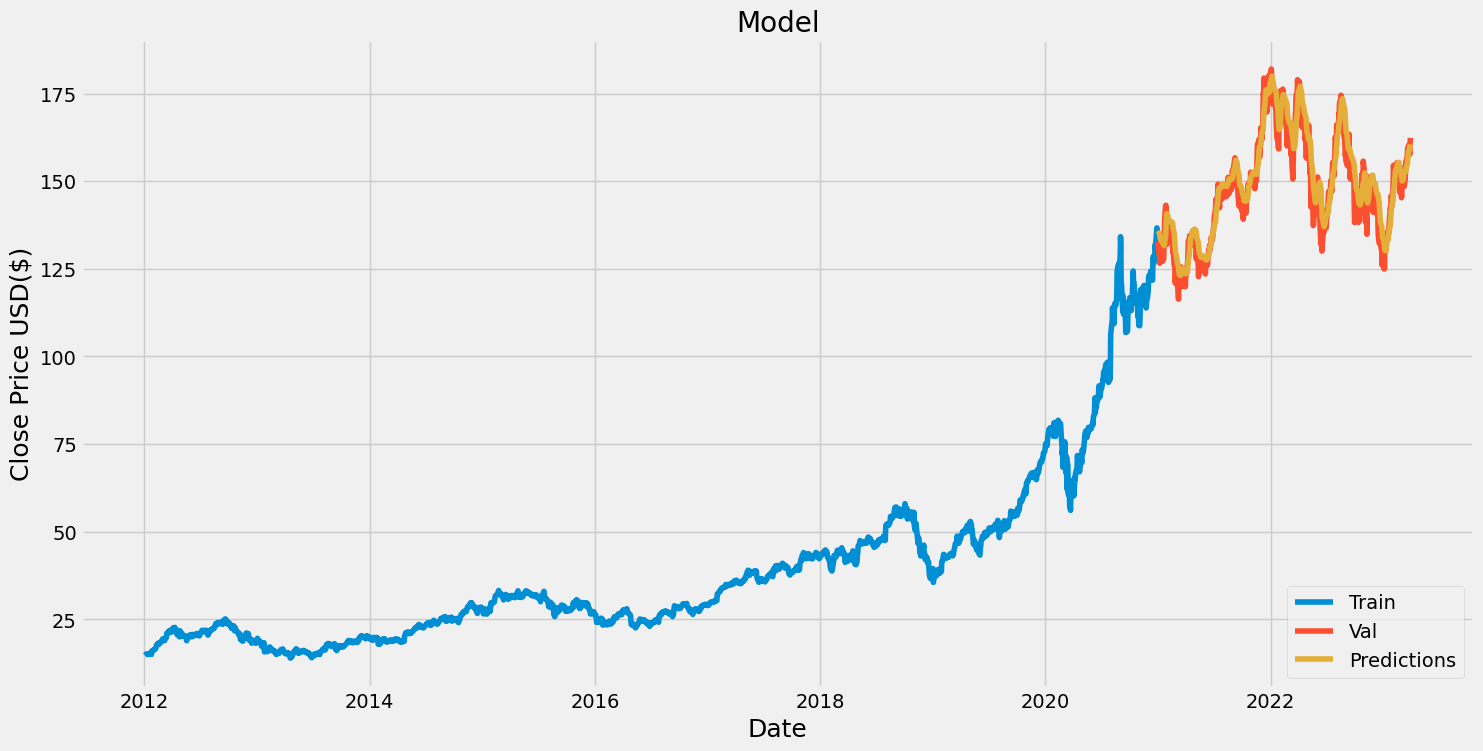

In [115]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [116]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-12-31,132.690002,134.799774
2021-01-04,129.410004,135.236099
2021-01-05,131.009995,135.047867
2021-01-06,126.599998,134.788925
2021-01-07,130.919998,133.981110
...,...,...
2023-03-24,160.250000,158.478394
2023-03-27,158.279999,159.322189
2023-03-28,157.649994,159.835617


In [117]:
#Get the quote
quote = yf.download('AAPL', start='2012-01-01' , end='2023-03-31')
#Create a new dataframe
new_df = quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = (model.predict(X_test))
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 32ms/step
[[159.54674]]
